<img style='float: right' src="http://cer.ucsd.edu/_images/logo-bw.jpg" width="200" height="40" > <br> <br>
# Light Intensity Fluctuations Analysis
## Inspect Frequency Space of Camera Data


### Description:
A Fourier analysis of periodic events captured with the Fast Camera

Version 1.0, 7-OCT-2016

In [1]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
import json
import os
s = json.load(open('..\\7  Notebook Config Files\\bmh_matplotlibrc.json') )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update(s)

def css_styling():
    styles = open('..\\7  Notebook Config Files\\custom.css', "r").read()
    return HTML(styles)
css_styling()

import numpy as np
import math as m
import h5py
from tqdm import tqdm

figsize(16,9)

In [3]:
def openfile_dialog():
    from PyQt4 import QtGui
    app = QtGui.QApplication([dir])
    fname = QtGui.QFileDialog.getOpenFileName(None, "Select a file...",'..\\..\\2  Data\\1  Fast Camera Data\\', filter="All files (*dcoff.h5)")
    return str(fname)
filename = openfile_dialog()
print os.getcwd()
with h5py.File(filename,'r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    hf_data = hf.get('images')
    fluc = np.array(hf_data)
    print('Shape of the Image Array: \n', fluc.shape)

L:\Master Drive\PISCES BIG\PISCES Share\1  Code\2  Imaging Notebooks
('List of arrays in this file: \n', [u'images'])
('Shape of the Image Array: \n', (96L, 96L, 3800L))


# Fast Camera Fourier Analysis

Using background subtracted camera data, values of the light intensity at each pixel can be followed. Each pixel's values forms a time series. 

In [4]:
I = len(fluc[:,1,1])
J = len(fluc[1,:,1])
K = len(fluc[1,1,:])
fft = np.zeros((I,J,K),dtype=np.complex)

for i in tqdm(range(0,I)):
    for j in range(0,J):
        pfft = np.fft.fft(fluc[i,j,:],2048)
        fft[i,j,0:2048] = pfft.real

100%|█████████████████████████████████████████| 96/96 [00:00<00:00, 156.10it/s]


In [5]:
fs = 25000
w = np.linspace(0,m.ceil(fs/2),K/2)

C:\Users\Narwhal\Anaconda2\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


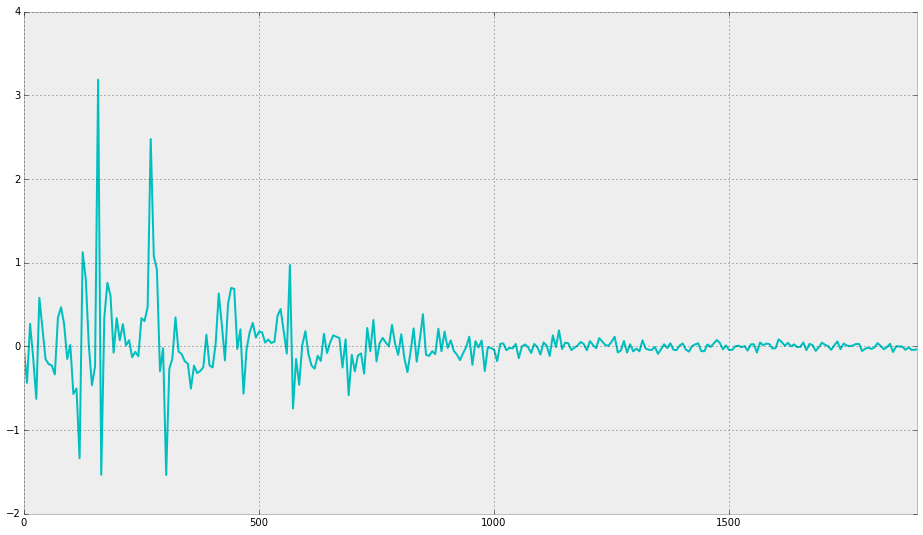

In [6]:
FFT =[]
for i in range(len(fft[70,64,0:K/2])):
    FFT.append(fft[70,64,0:K/2][i]/sum(fft[70,64,0:K/2]))
plt.plot(w,FFT,'c')
plt.xlim(0,K/2)
plt.show()

<footer>
  <p>Created by: Kyle Adriany</p>
  <p>Contact information: <a href="mailto:kyle.adriany@gmail.com">
    kyle.adriany@gmail.com</a>.</p>
    
    <p>Copyright © 2016 Kyle Adriany</p>
    
    <p>The MIT License (MIT)</p>
    

 <p>Permission is hereby granted, free of charge, to any person obtaining a copy
 of this software and associated documentation files (the "Software"), to deal
 in the Software without restriction, including without limitation the rights
 to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 copies of the Software, and to permit persons to whom the Software is
 furnished to do so, subject to the following conditions:</p>
 
 <p>The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.</p>

 <p>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 THE SOFTWARE.</p>
</footer>